In [13]:
from collections import defaultdict
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
#Train Data
df = pd.DataFrame()
df = pd.read_csv("D:/ETSII/3 CARRERA_ERASMUS/2T/AI/AIPROJECT/data/train_clean.csv")
df

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1190.0,43560.0,98107,740000.0
...,...,...,...,...,...,...
1655,3,3.5,1680.0,1486.0,98126,675000.0
1656,2,2.0,1400.0,14810.4,98199,699950.0
1657,3,2.0,1370.0,21780.0,98112,910000.0
1658,4,2.0,2140.0,6250.0,98199,1150000.0


In [24]:
#Test data
df_train = pd.DataFrame()
df_train = pd.read_csv("D:/ETSII/3 CARRERA_ERASMUS/2T/AI/AIPROJECT/data/test_clean.csv")
df_train

,beds,baths,size,lot_size,zip_code,price
0,3,3.0,2850.0,4200.0,98119,1175000.0
1,4,5.0,3040.0,5002.0,98106,1057500.0
2,3,1.0,1290.0,6048.0,98125,799000.0
3,3,2.0,2360.0,12196.8,98188,565000.0
4,3,3.5,1942.0,1603.0,98107,1187000.0
...,...,...,...,...,...,...
422,5,4.5,5580.0,13068.0,98146,3800000.0
423,3,2.5,1390.0,1570.0,98126,575000.0
424,3,2.5,2950.0,20473.2,98118,3105000.0
425,5,5.0,3010.0,4887.0,98115,1807000.0


In [25]:
df["lot_size"] *= 0.093  # change to squared meters
df_train["lot_size"] *= 0.093

list_size = [x for x in df["lot_size"]]
list_price = [x / 1000000 for x in df["price"]]

In [27]:
def plot_price_size():
    plt.plot(list_size, list_price)
    plt.title("Price according total size")
    plt.xlabel("Squared meters")
    plt.ylabel("Millions of $")

    plt.show()
    # there is no progressive relation between the price and the size, so it must depend on more factors


# Plots the relation between price and size of houses with less than 2500 sqft
def small_price_size():
    sizes = [x for x in df["lot_size"] if x < 2500]
    print(len(sizes))
    prices = [x / 1000000 for x in df.loc[df["lot_size"] < 2500, "price"]]
    # df.loc[df_train['lot_size_units'] == 'acre', 'lot_size'] *= 43560

    plt.plot(sizes, prices)
    plt.title("Price according total size")
    plt.xlabel("Squared meters")
    plt.ylabel("Millions of $")

    plt.show()


# Plots the relation between price and size in houses that are located
# in the zip code given as a parameter
def plot_price_size_code(code):
    sizes = [x for x in df.loc[df["zip_code"] == code, "lot_size"]]
    prices = [x / 1000000 for x in df.loc[df["zip_code"] == code, "price"]]
    plt.plot(sizes, prices, marker=".")
    title = "Price according total size, code:" + str(code)
    plt.title(title)
    plt.xlabel("Squared meters")
    plt.ylabel("Millions of $")

    plt.show()


# Plots the relation between price and size of the first n houses
# one line represents houses with 1 bath, the other one houses
# with 2 baths
def plot_price_size_baths(n):
    sizes1 = [x for x in df.loc[df["baths"] == 1, "lot_size"]]
    prices1 = [x / 1000000 for x in df.loc[df["baths"] == 1, "price"]]

    sizes2 = [x for x in df.loc[df["baths"] == 2, "lot_size"]]
    prices2 = [x / 1000000 for x in df.loc[df["baths"] == 2, "price"]]

    plt.style.use("ggplot")
    plt.plot(sizes1[:n], prices1[:n], marker=".")
    plt.plot(sizes2[:n], prices2[:n], marker=".")
    plt.title("Price according total size")
    plt.xlabel("Squared meters")
    plt.ylabel("Millions of $")
    plt.legend(["1 baths", "2 baths"])
    plt.grid(True)

    plt.show()


def plot_scatter_baths_price_size():
    sizes1 = [x for x in df.loc[df["baths"] == 1, "lot_size"]]
    prices1 = [x / 1000000 for x in df.loc[df["baths"] == 1, "price"]]

    sizes2 = [x for x in df.loc[df["baths"] == 2, "lot_size"]]
    prices2 = [x / 1000000 for x in df.loc[df["baths"] == 2, "price"]]

    sizes3 = [x for x in df.loc[df["baths"] == 3, "lot_size"]]
    prices3 = [x / 1000000 for x in df.loc[df["baths"] == 3, "price"]]

    plt.style.use("ggplot")

    plt.scatter(sizes1, prices1, marker='o', c='b')
    plt.scatter(sizes2, prices2, marker="o")
    plt.scatter(sizes3, prices3, marker="o")

    plt.title('Price according to size')
    plt.xlabel('Squared feet')
    plt.ylabel('Millions of $')
    plt.legend(["1 baths", "2 baths", "3 baths"])
    plt.grid(True)
    plt.show()


def scatter_price_size_zipCode(z1, z2, z3):
    sizes1 = [x for x in df.loc[df["zip_code"] == z1, "lot_size"]]
    prices1 = [x / 1000000 for x in df.loc[df["zip_code"] == z1, "price"]]

    sizes2 = [x for x in df.loc[df["zip_code"] == z2, "lot_size"]]
    prices2 = [x / 1000000 for x in df.loc[df["zip_code"] == z2, "price"]]

    sizes3 = [x for x in df.loc[df["zip_code"] == z3, "lot_size"]]
    prices3 = [x / 1000000 for x in df.loc[df["zip_code"] == z3, "price"]]

    plt.style.use("ggplot")

    plt.scatter(sizes1, prices1, marker='o', c='b')
    plt.scatter(sizes2, prices2, marker="o")
    plt.scatter(sizes3, prices3, marker="o")

    plt.title('Price according to size')
    plt.xlabel('Squared feet')
    plt.ylabel('Millions of $')
    plt.legend([str(z1), str(z2), str(z3)])
    plt.grid(True)
    plt.show()


def J(x, y, m, theta_0, theta_1):
    returnValue = 0
    h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x
    for i in range(m):
        pred = h(theta_0, theta_1, x[i])
        returnValue += (pred - y[i]) ** 2  # prediction for a given x example
    returnValue = returnValue / (2 * m)  # loss for that given x example
    return returnValue  ##the mean loss fo the batch of the dataset


def grad_J(x, y, m, theta_0, theta_1):  # Calculate the grdient for the batch data
    returnValue = np.array([0., 0.])  # A list of teo number
    h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x
    for i in range(m):  # For every element in the data
        returnValue[0] += (h(theta_0, theta_1, x[i]) - y[i])  # the gradient for thetha 0 with respect to
        returnValue[1] += (h(theta_0, theta_1, x[i]) - y[i]) * x[i]
    returnValue = returnValue / (m)
    return returnValue


def compute_price_size_gradient(dataFrame):

    sizes1 = [x for x in dataFrame.loc[dataFrame["lot_size"]<=2500, "lot_size"]]
    prices1 = [x/1000000 for x in dataFrame.loc[dataFrame["lot_size"]<=2500, "price"]]

    x = sizes1
    y = prices1
    m = len(x)

    theta_old = np.array([0.,0.])
    theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
    n_k = 0.001 # step size, note this is constant
    precision = 0.01
    num_steps = 0
    s_k = float("inf")

    while np.linalg.norm(s_k) > precision:
        num_steps += 1
        theta_old = theta_new
        s_k = -grad_J(x,y,m,theta_old[0],theta_old[1])
        theta_new = theta_old + n_k * s_k*0.005



    print("Local minimum occurs where:")

    print("theta_0 =", theta_new[0])
    print("theta_1 =", theta_new[1])
    print("This took", num_steps, "steps to converge")


    return [sizes1, prices1, theta_new]


def scatter_price_size_gradient(dataFrame):
    res = compute_price_size_gradient(dataFrame)  # [sizes1, prices1, theta_new]

    xx = np.linspace(0, max(res[0]), len(res[0]))
    h = lambda theta_0, theta_1, x: theta_0 + theta_1 * x

    plt.style.use("ggplot")




    plt.scatter(res[0], res[1], marker='o', c='b')
    plt.plot(xx, h(res[2][0], res[2][1], xx))
    plt.ylim([0,6])
    plt.title('Price according to size')
    plt.xlabel('Squared feet')
    plt.ylabel('Millions of $')
    plt.grid(True)
    plt.show()


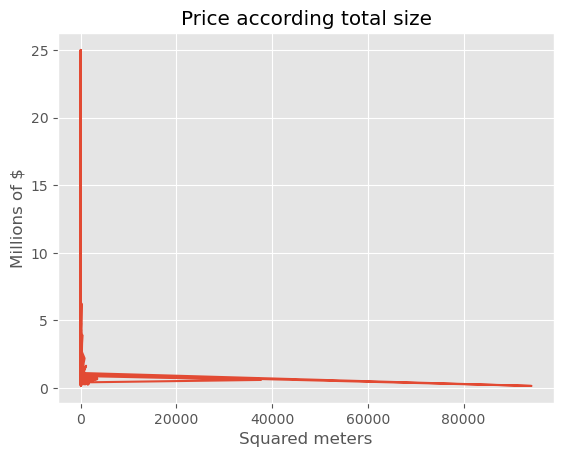

In [28]:

plot_price_size()


1654


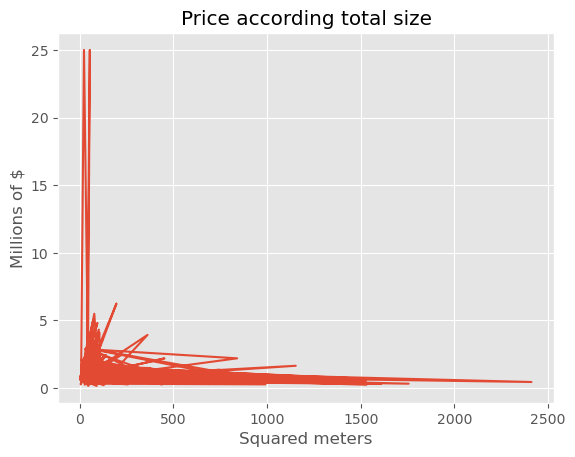

In [29]:
small_price_size()


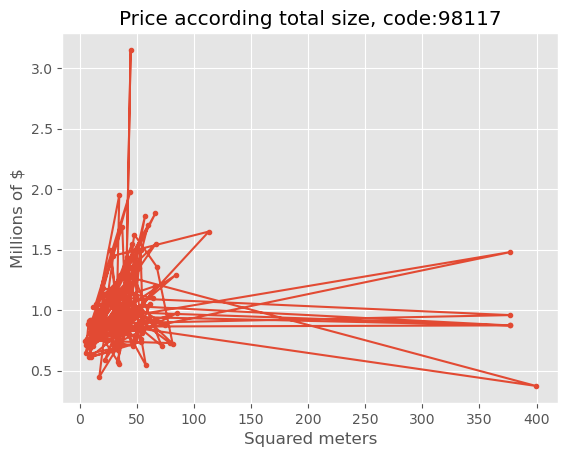

In [30]:
plot_price_size_code(98117)


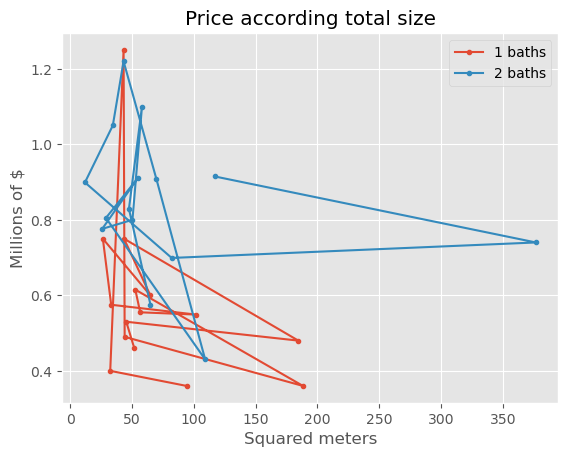

In [31]:
plot_price_size_baths(15)


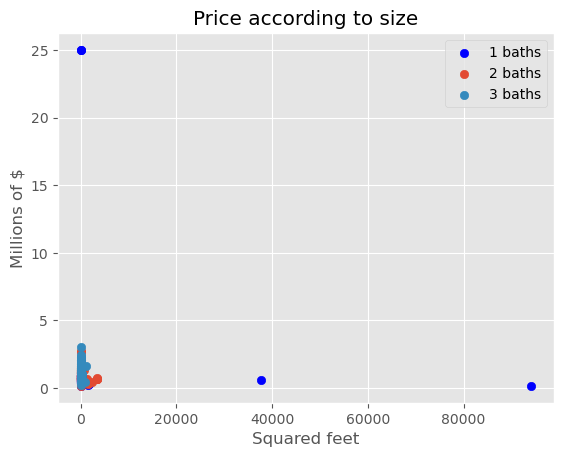

In [32]:
plot_scatter_baths_price_size()


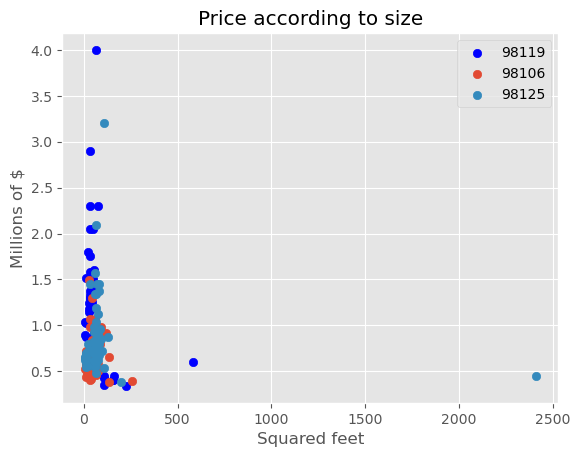

In [33]:
scatter_price_size_zipCode(98119, 98106, 98125)


Local minimum occurs where:
theta_0 = 0.9986495839795377
theta_1 = 0.00010731336507325408
This took 168 steps to converge


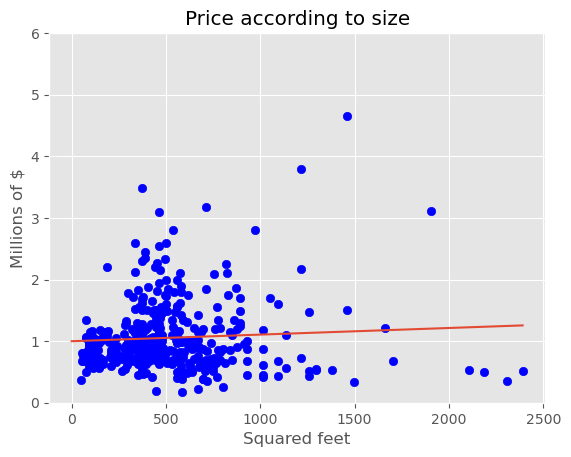

In [36]:
scatter_price_size_gradient(df_train)


In [37]:
compute_price_size_gradient(df_train)

Local minimum occurs where:
theta_0 = 0.9986495839795377
theta_1 = 0.00010731336507325408
This took 168 steps to converge


[[390.6,
  465.186,
  562.4639999999999,
  1134.3024,
  149.079,
  442.029,
  540.33,
  391.158,
  337.59,
  465.0,
  372.0,
  228.78,
  617.52,
  1296.3456,
  325.5,
  465.0,
  302.25,
  284.58,
  350.98199999999997,
  613.8,
  558.0,
  267.375,
  207.018,
  401.109,
  396.459,
  186.0,
  378.138,
  669.6,
  446.4,
  73.749,
  466.86,
  372.0,
  1215.324,
  892.986,
  360.84,
  360.84,
  479.88,
  74.121,
  474.3,
  562.65,
  776.829,
  581.25,
  503.59499999999997,
  139.5,
  874.665,
  1012.77,
  393.018,
  1134.3024,
  419.151,
  101.835,
  267.375,
  449.19,
  409.2,
  341.031,
  446.307,
  465.0,
  2187.5832,
  372.0,
  179.397,
  221.34,
  389.856,
  305.96999999999997,
  767.715,
  1458.3888,
  2106.5616,
  110.577,
  502.2,
  492.9,
  558.0,
  534.75,
  837.0,
  446.4,
  372.0,
  697.5,
  349.215,
  785.85,
  401.76,
  348.75,
  580.32,
  54.219,
  372.0,
  115.506,
  1093.7916,
  1255.8348,
  726.33,
  295.275,
  1012.77,
  96.441,
  284.58,
  155.217,
  871.875,
  297.6,
  9